# Supervised Learning
## Overfitting and Regularization

Alexander Goncearenco

March 7, 2019

### Recap supervised learning and regression

In [96]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

# boston.DESCR.splitlines()

In [93]:
"X:", X.shape, "y:", y.shape

('X:', (506, 13), 'y:', (506,))

In [81]:
from sklearn.linear_model import LinearRegression

lr_house_price = LinearRegression().fit(X, y)

In [82]:
predicted_price = lr_house_price.predict(X)

In [83]:
predicted_price.shape

(506,)

In [84]:
%matplotlib inline

import pandas as pd
import seaborn as sb

d = pd.DataFrame(X)
d['predicted_price'] = pd.Series(predicted_price)
d['actual_price'] = pd.Series(y)

In [85]:
d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,predicted_price,actual_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,30.003843,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,25.025562,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,30.567597,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,28.607036,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,27.943524,36.2


### How we evaluate performance of models?

In [86]:
# Squareed error for each example:

d['squared_error'] = (d['predicted_price'] - d['actual_price'])**2
d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,predicted_price,actual_price,squared_error
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,30.003843,24.0,36.046135
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,25.025562,21.6,11.734478
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,30.567597,34.7,17.076757
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,28.607036,33.4,22.972499
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,27.943524,36.2,68.169392


In [87]:
# Overall performance: mean squared error:

d['squared_error'].mean()

21.894831181729202

In [90]:
# It is the same as mean_squared_error in scikit-learn

from sklearn.metrics import mean_squared_error
mean_squared_error(d['actual_price'], d['predicted_price'])

21.894831181729202

In [92]:
# Sometimes Root Mean Squared Error (RMSE) is used
# RMSE preserves the scale of the units (e.g. price in dollars)
np.sqrt(mean_squared_error(d['actual_price'], d['predicted_price']))

4.679191295697281

## But will the model be able to predict the future cases?

Remember what happens when we train and predict using KNearestNeighbors(K=1)?

In [97]:
from sklearn.neighbors import KNeighborsRegressor

predicted_price = KNeighborsRegressor(n_neighbors=1).fit(X, y).predict(X)
actual_price = y
mean_squared_error(actual_price, predicted_price)

0.0

### Solution: split the dataset

The learning algorithm uses examples only from the training set and it cannot use examples from any of the holdout sets.

* Training set (70% - 95%)

* Holdout sets: (5% - 30%)
    - Validation set
    - Test set
    

We want good performance on a holdout set, using the data the model has not seen before!

#### Why do we need two holdout sets?

We need validation set to choose the learning algorithm and its hyperparameters.

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [100]:
X_train.shape, y_train.shape

((339, 13), (339,))

In [101]:
X_test.shape, y_test.shape

((167, 13), (167,))

In [102]:
# Linear Regression

predicted_price = LinearRegression().fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test, predicted_price)

20.72402343733974

In [103]:
# KNN Regression(K=1)

predicted_price = KNeighborsRegressor(n_neighbors=1).fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test, predicted_price)

44.078263473053894

### Overfitting and Underfitting


* Overfitting - model performs well on the training set but performs poorly on the test set

* Underfitting - model does not perform well on the training set but its performance on test set is not much different


In [109]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

X12 = X[:, 12].reshape(-1, 1) # only one feature only but maintain 2D array shape
X12_train, X12_test, y_train, y_test = train_test_split(X12, y, test_size=0.33, random_state=42)

### Examples of underfitting and overfitting:

m1 - Linear Regression

m2 - Polynomial regression of the second degree

m5 - Polynomial regression of the fifth degree

#### Model m1:

$$ y = \beta_1 x + \beta_0 $$

In [151]:
m1 = LinearRegression(fit_intercept=True)
m1.fit(X12_train, y_train)
m1_train_predicted = m1.predict(X12_train)
m1_test_predicted = m1.predict(X12_test)

In [152]:
mean_squared_error(y_train, m1_train_predicted)

38.71120361270592

In [153]:
mean_squared_error(y_test, m1_test_predicted)

38.410075117662345

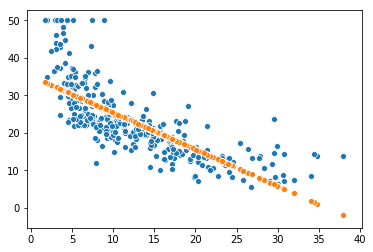

In [154]:
sb.scatterplot(X12_train.flatten(), y_train)
sb.scatterplot(X12_train.flatten(), m1_train_predicted)

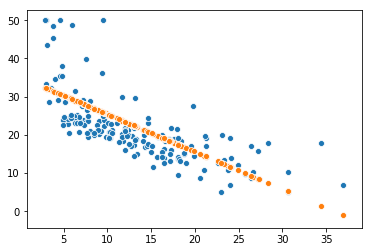

In [155]:
sb.scatterplot(X12_test.flatten(), y_test)
sb.scatterplot(X12_test.flatten(), m1_test_predicted)

#### Model m2:

$$ y = \beta_1 x + \beta_2 x^2 +  \beta_0 $$

In [156]:
m2 = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
m2.fit(X12_train, y_train)
m2_train_predicted = m2.predict(X12_train)
m2_test_predicted = m2.predict(X12_test)

In [157]:
mean_squared_error(y_train, m2_train_predicted)

29.442905187577

In [158]:
mean_squared_error(y_test, m2_test_predicted)

32.51162005950162

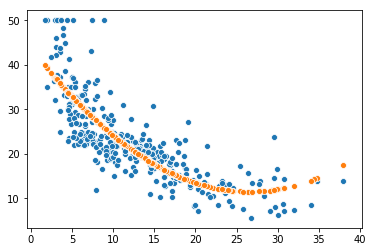

In [159]:
sb.scatterplot(X12_train.flatten(), y_train)
sb.scatterplot(X12_train.flatten(), m2_train_predicted)

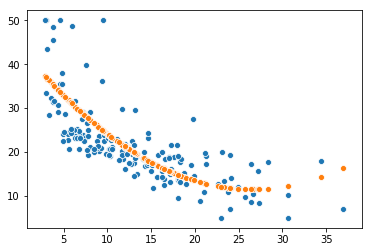

In [173]:
sb.scatterplot(X12_test.flatten(), y_test)
sb.scatterplot(X12_test.flatten(), m2_test_predicted)

#### Model m10:

$$ y = \beta_1 x + \beta_2 x^2 +  \beta_3 x^3 +  ... + \beta_{10} x^{10} + \beta_0 $$

In [174]:
m10 = Pipeline([('poly', PolynomialFeatures(degree=10)),
                  ('linear', LinearRegression(fit_intercept=False))])
m10.fit(X12_train, y_train)
m10_train_predicted = m10.predict(X12_train)
m10_test_predicted = m10.predict(X12_test)

In [175]:
mean_squared_error(y_train, m5_train_predicted)

32.40659745570643

In [176]:
mean_squared_error(y_test, m5_test_predicted)

36.9722089298378

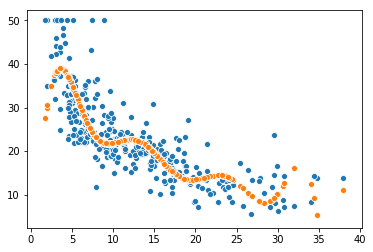

In [177]:
sb.scatterplot(X12_train.flatten(), y_train)
sb.scatterplot(X12_train.flatten(), m5_train_predicted)

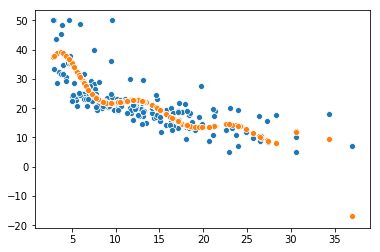

In [178]:
sb.scatterplot(X12_test.flatten(), y_test)
sb.scatterplot(X12_test.flatten(), m5_test_predicted)

### Let us summarize the models' errors

In [183]:
print("M1 train", round(mean_squared_error(y_train, m1_train_predicted)))
print("M1 test", round(mean_squared_error(y_test, m1_test_predicted)))
      
print("M2 train", round(mean_squared_error(y_train, m2_train_predicted)))
print("M2 test", round(mean_squared_error(y_test, m2_test_predicted)))

print("M10 train", round(mean_squared_error(y_train, m10_train_predicted)))
print("M10 test", round(mean_squared_error(y_test, m10_test_predicted)))

M1 train 39.0
M1 test 38.0
M2 train 29.0
M2 test 33.0
M10 train 32.0
M10 test 37.0


We will talk about model selection and feature selection in mode detail in one of the next classes.

### Is there only one way to split the dataset? Cross-validation

Cross-validation is reusing the dataset and creates multiple train-holdout subset pairs.

The major assumption is that our whole dataset is a representative sample. By taking the random subsamples from the whole dataset we can estimate the performance of the model on previously unseen data.

#### LeaveOneOut

LeaveOneOut (or LOO) is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for  n samples, we have  n different training sets and  n different tests set. This cross-validation procedure does not waste much data as only one sample is removed from the training set

##### KFold
KFold divides all the samples in  k groups of samples, called folds (if  k = n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using 
k−1folds, and the fold left out is used for test.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0041.png)

#### ShuffleSplit

The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0061.png)

#### TimeSeriesSplit

TimeSeriesSplit is a variation of k-fold which returns first 
k folds as train set and the (k+1)th fold as test set. Note that unlike standard cross-validation methods, successive training sets are supersets of those that come before them. Also, it adds all surplus data to the first training partition, which is always used to train the model.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0101.png)

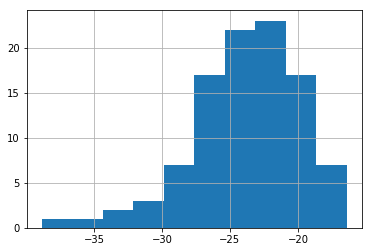

In [194]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

# here we try to maximize the score, that is why neg_mean_squared_error
# essentially, score = - cost_function
s = cross_val_score(reg, X, y, cv=cv, scoring='neg_mean_squared_error')
pd.Series(s).hist()

In [195]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

### Bias - Variance Tradeoff

The **bias** is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).


The **variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

### Let's plot some learning curves

In [197]:
#From http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

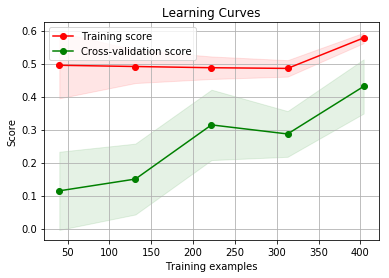

In [204]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
title = "Learning Curves"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
# model = LinearRegression()
model = KNeighborsRegressor(n_neighbors=10)

plot_learning_curve(model, title, X, y, cv=cv_iterator, n_jobs=4)

plt.show()

#### Lasso Regression

“when you have two competing theories that make exactly the same predictions, the simpler one is the better.” - William of Ockham

So for a regression model LASSO (least absolute shrinkage and selection operator), or more commonly referred to as L1 regularization, could be used to penalize for the large number of parameters.

* L1 regularization (the last term of the equation) favors a sparse model with  features having coefficients equal to zero or close to zero:

$$ Loss =  ||y - Xw||^2_2 + \alpha * ||w||_1$$

L1 norm $||w||_1$ is simply a sum of absolute values of coefficients and $\alpha$ regulates the strength of regularization. A zero coefficient for a feature essentially mean that the feature is eliminated.



In [205]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

llr = Lasso(alpha=0.5)
llr.fit(X, y)
preds = llr.predict(X)

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)

# Note: default in sklearn: higher return values are better than lower return values
cross_val_score(llr, X, y, cv=cv_iterator, scoring="neg_mean_squared_error")
cross_val_score(llr, X, y, cv=5, scoring="neg_mean_squared_error")
abs(np.mean(cross_val_score(llr, X, y, cv=5, scoring="neg_mean_squared_error")))

34.63412434342716

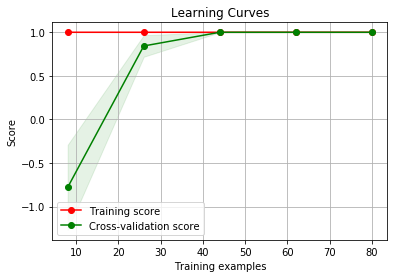

In [7]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
title = "Learning Curves"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
llr = Lasso(alpha=0.5)

plot_learning_curve(llr, title, X, y, cv=cv_iterator, n_jobs=4)

plt.show()

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,
 

$$ Loss = ||y - Xw||^2_2 + \alpha * ||w||^2_2$$

Here, 
α
≥
0
 is a complexity parameter that controls the amount of shrinkage: the larger the value of 
α
, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

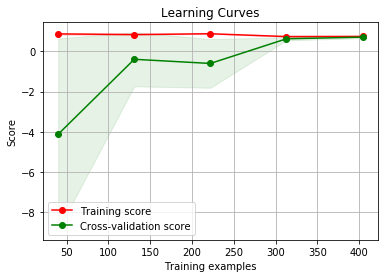

In [207]:
from sklearn.linear_model import Ridge

title = "Learning Curves"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
llr = Ridge(alpha=0.5)

plot_learning_curve(llr, title, X, y, cv=cv_iterator, n_jobs=4)

plt.show()

## Optimizing hyperparameters with GridSearchCV

In [208]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error

# Parameter grid
p_grid = {
    "alpha": [0.1, 0.5, 1, 1.5]
}

# CV iterators
inner_cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
outer_cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)

# Hyperparameter optimization
lasso = Lasso()
llr = GridSearchCV(estimator=lasso, param_grid=p_grid, cv=inner_cv_iterator)
cross_val_score(llr, X=X, y=y, cv=outer_cv_iterator)

/Users/agoncear/anaconda/envs/jupyter/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([0.64070919, 0.66542455, 0.80625413, 0.72228942, 0.6372365 ])